

# Taller: Análisis de Hipótesis con Datos de la ENS 2016-2017



## 1. Introducción



En investigación cuantitativa, la docimacia de hipótesis (o prueba de hipótesis) permite evaluar si las diferencias observadas en los datos pueden atribuirse al azar o reflejan patrones reales en la población. Este taller tiene como objetivo introducir herramientas estadísticas para comprobar hipótesis en datos reales, utilizando Python como herramienta de análisis.



A partir de la Encuesta Nacional de Salud (ENS) 2016-2017, trabajaremos con variables demográficas, biométricas y clínicas para:

- Verificar supuestos de normalidad.

- Comparar variables entre grupos (por ejemplo, hombres vs. mujeres).

- Analizar diferencias en variables continuas y categóricas.



Este análisis es clave para evaluar desigualdades en salud, diseñar políticas basadas en evidencia y generar conclusiones confiables a partir de datos poblacionales.



## 2. Objetivos

Al finalizar este taller, los y las estudiantes serán capaces de:



* Evaluar la normalidad de variables cuantitativas

- Verificar normalidad en variables como Edad, Peso, Talla, Glicemia y Colesterol.

* Comparar variables continuas entre grupos

- Aplicar pruebas t de Student para muestras independientes (hombres vs. mujeres).

- Comparar variables como Peso, IMC, y Glucosa por sexo.

* Comparar variables categóricas u ordinales

- Utilizar pruebas como chi-cuadrado o pruebas no paramétricas.

* Interpretar resultados

- Comprender el significado de los valores p.

- Formular y contrastar hipótesis nula y alternativa.

- Traducir los resultados estadísticos en hallazgos interpretables en contexto de salud pública.



## 3. Dataset



La Encuesta Nacional de Salud (ENS) 2016-2017 es un estudio representativo de la población chilena que recopila datos sobre salud física y mental, factores de riesgo, estilo de vida y uso de servicios sanitarios. Esta información permite caracterizar el estado de salud y sus determinantes a nivel nacional.En este taller trabajaremos con un subconjunto de variables relevantes para el análisis estadístico de hipótesis. Los datos son de acceso público y están disponibles en este repositorio. A través de este conjunto de datos, aprenderemos a aplicar pruebas estadísticas clásicas sobre variables reales, extrayendo conclusiones aplicables a la investigación en salud pública. Los datos se encuentran [disponibles públicamente](https://data.mendeley.com/datasets/3myh3nzcy3/1).

<div style="text-align:center;">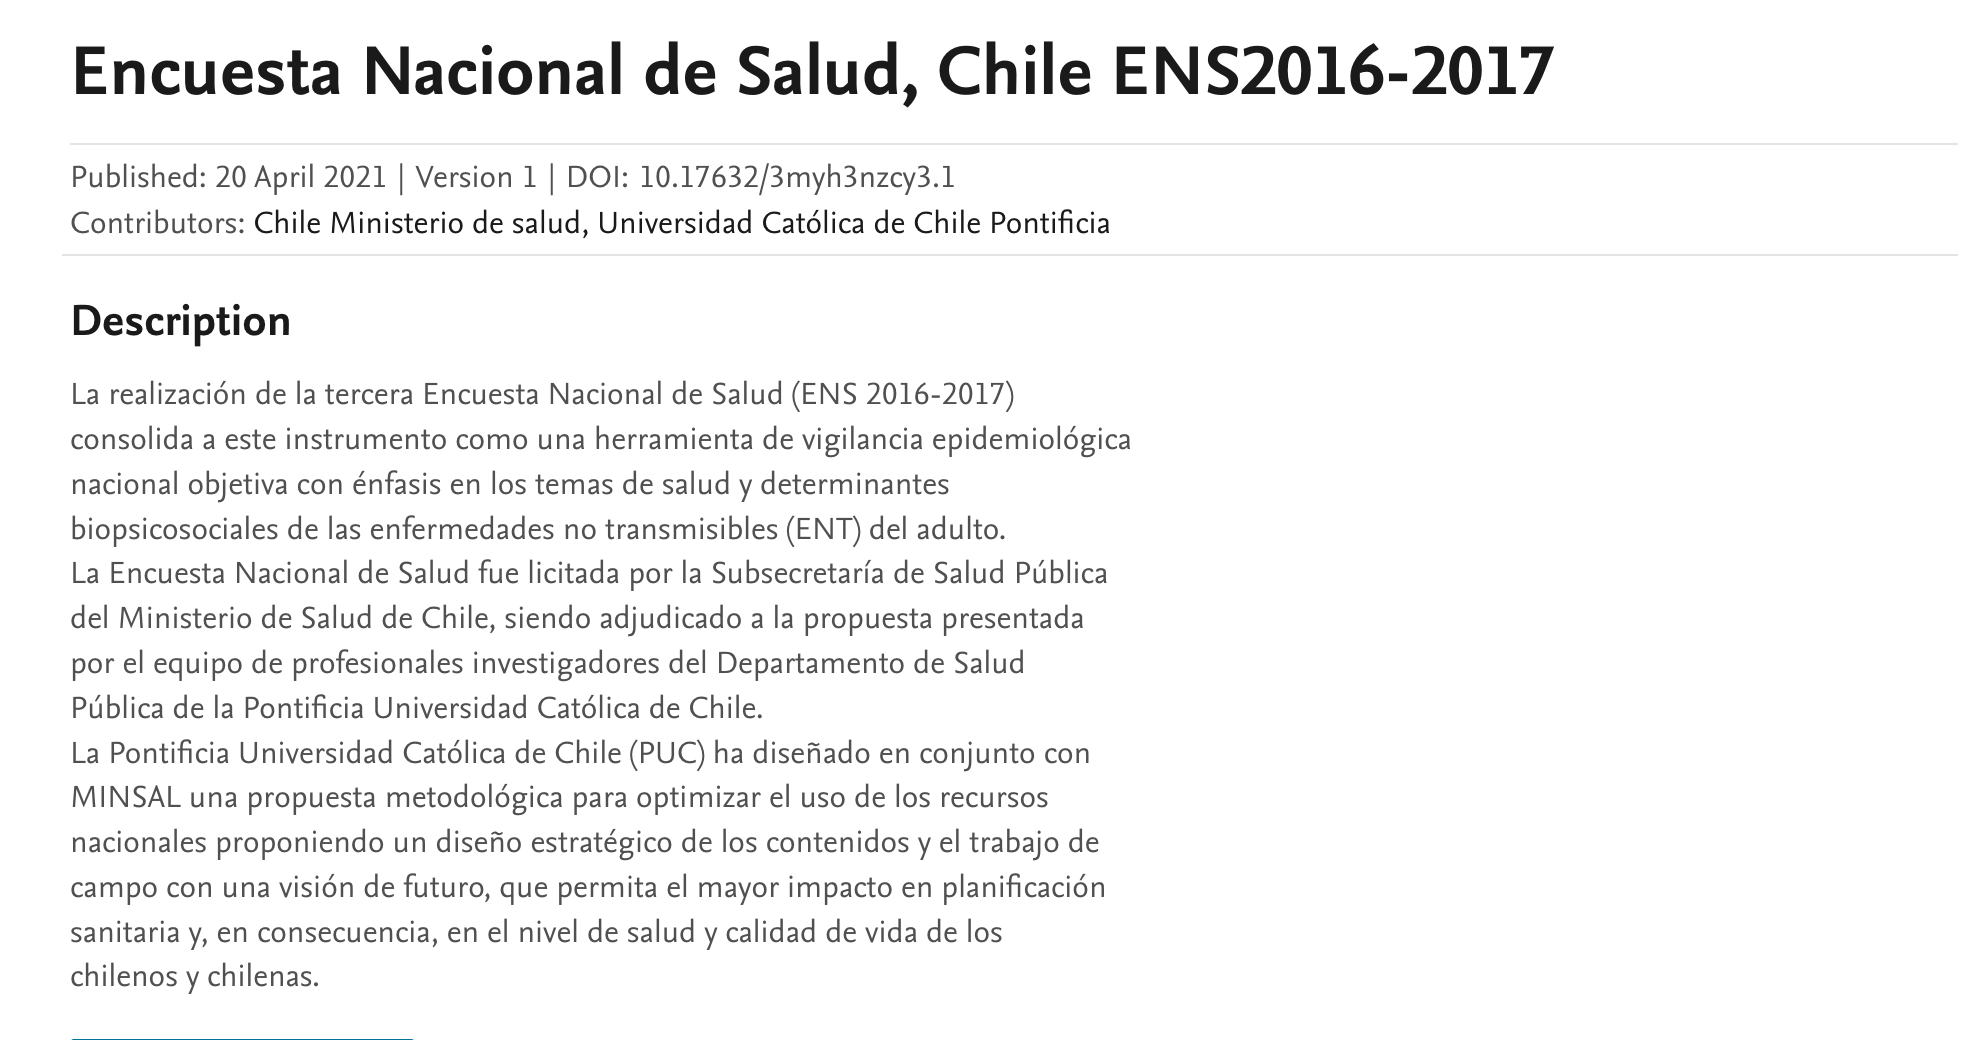</div>


### 3.1 Librerías necesarias
Las siguientes librerias son necesarias para el análisis de datos y visualización. 

In [2]:
%%capture
# Instalar librerias para leer archivos SPSS
!pip install pyreadstat

In [97]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### 3.2 Cargar Datos

Tal como se realizo en el taller anterior, se descargara la base de datos utilizando `wget` y luego se cargara la base de datos en la variable `ens` utilizando la función de pandas `read_spss`.  

In [4]:
# Descargar ENS
!wget https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav

--2025-07-16 10:05:20--  https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav [siguiendo]
--2025-07-16 10:05:21--  https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.111.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 34441286 (33M) [application/octet-stream]
Grabando a: «ENS2016-2017.sav.4»

ENS2016-2017.sav.4  100%[==============

In [98]:
ens = pd.read_spss('ENS2016-2017.sav')
print(ens.head())
print(ens.shape)

   IdEncuesta  FechaInicioF1               Region    Comuna    Zona  \
0     20006.0   1.369894e+10  XIII. Metropolitana  Santiago  URBANA   
1     20008.0   1.369964e+10  XIII. Metropolitana  Santiago  URBANA   
2     20011.0   1.369955e+10  XIII. Metropolitana  Santiago  URBANA   
3     20012.0   1.369903e+10  XIII. Metropolitana  Santiago  URBANA   
4     20013.0   1.369902e+10  XIII. Metropolitana  Santiago  URBANA   

   IdSegmento  IdPersona_1      Ident7  Edad Edad_Codificada  ...  \
0  13101101.0        241.0  1977-12-18  38.0         25 - 44  ...   
1  13101101.0        197.0  1991-10-23  25.0         25 - 44  ...   
2  13101102.0        321.0  1996-05-31  20.0           15-24  ...   
3  13101102.0        245.0  1931-04-14  85.0             65+  ...   
4  13101102.0        242.0  1975-06-24  41.0         25 - 44  ...   

  fg_CKDschwartz_diminuido_60 fg_CKDschwartz_diminuido_30 Fechaini_F1  \
0                         NaN                         NaN  2016-11-19   
1           

## 4 Test de normalidad

En estadística inferencial, muchas de las pruebas más utilizadas —como la t de Student, el ANOVA y los intervalos de confianza— se basan en un supuesto fundamental: que las variables que analizamos siguen una distribución normal (también llamada distribución gaussiana o de campana). Este supuesto afecta directamente la validez de los resultados.

Verificar la normalidad nos permite:
* Determinar si podemos aplicar pruebas paramétricas, que suelen ser más potentes y precisas.
* Evitar errores al interpretar p-valores o al calcular promedios y desviaciones estándar.
* Decidir si necesitamos transformar los datos o usar pruebas no paramétricas alternativas (como Mann-Whitney o Kruskal-Wallis).

La forma tipica de una variable que distribute normal se puede observar en la siguiente figura:

<div style="text-align:center;">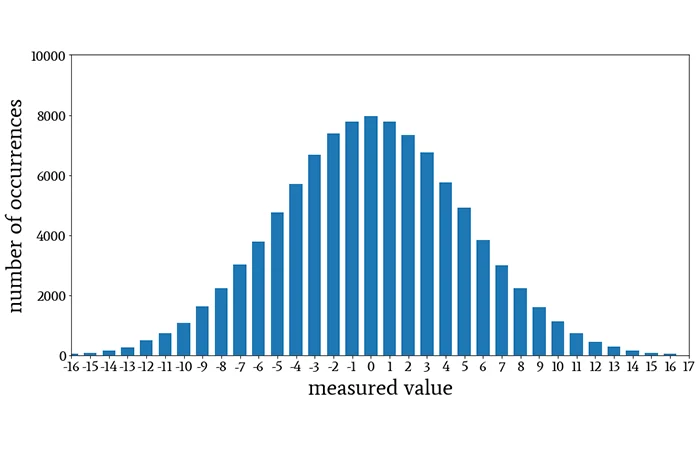</div>

Es de mucha utilidad visualizar los datos mediante su histograma para entender el comportamiento de estos.


#### **Ejercicio 1** 

Utiliza histogramas para comprobar la normalidad de las variables: `edad`, `Colesterol_HDL`, `Glucosa`, `IMC` y `Microalbuminuria_Creatinina`. Crea un gráfico para cada variable, modificando la cantidad de *bins* según sea necesario. Responde:

* ¿Qué variables parecen seguir una distribución normal?
* ¿Qué sucede en variables como la creatinina?
* Con base solo en los histogramas, ¿podemos asegurar la normalidad de los datos?

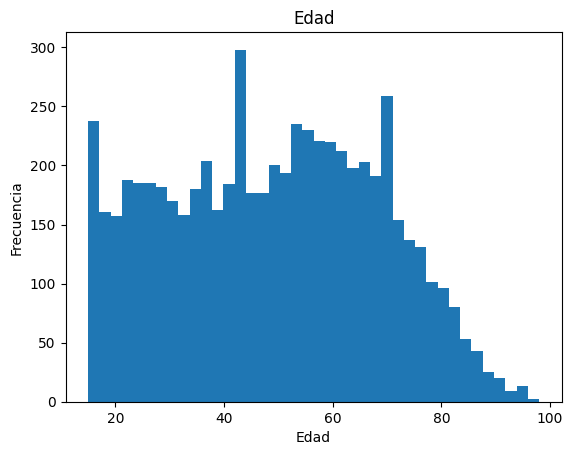

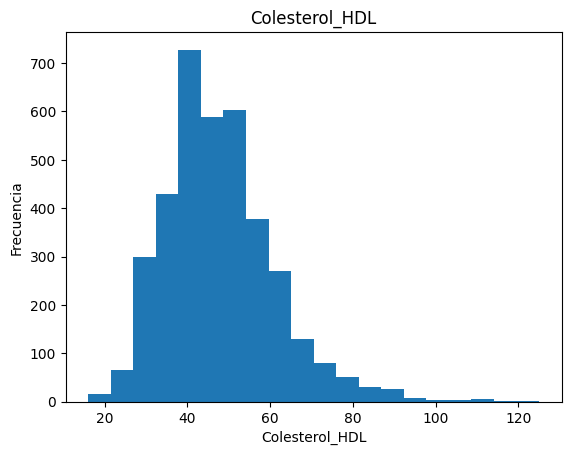

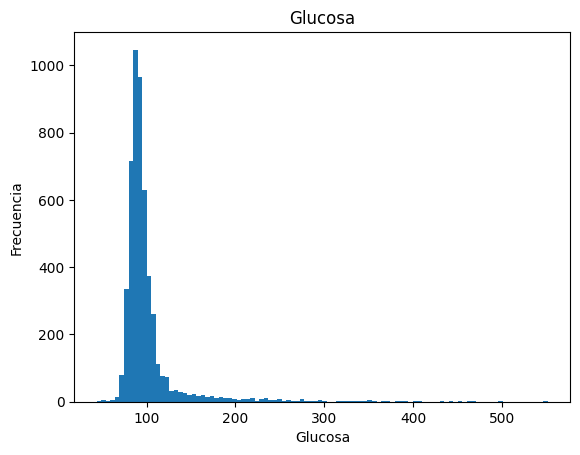

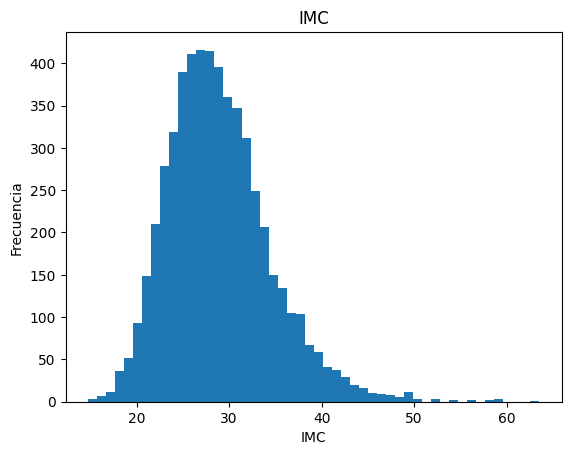

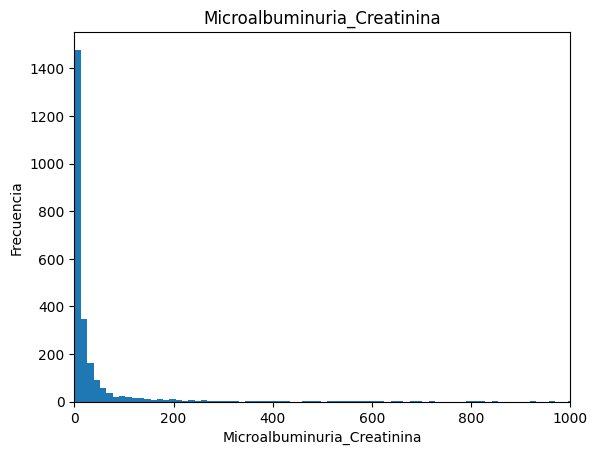

In [99]:
# <CODE>
variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

v = 'Edad'
fig = plt.figure()
plt.hist(ens[v],bins=40)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Colesterol_HDL'
fig = plt.figure()
plt.hist(ens[v],bins=20)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Glucosa'
fig = plt.figure()
plt.hist(ens[v],bins=100)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'IMC'
fig = plt.figure()
plt.hist(ens[v],bins=50)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.show()

v = 'Microalbuminuria_Creatinina'
fig = plt.figure()
plt.hist(ens[v],bins=1000)
plt.title(v)
plt.xlabel(v)
plt.ylabel('Frecuencia')
plt.xlim([0, 1000])
plt.show()




Para evaluar si una variable sigue una distribución normal, es necesario realizar un test de hipótesis que permita verificar su comportamiento. Gran parte (si no todos) de los métodos para aplicar estos tests se encuentran implementados en Python.

#### **Ejercicio 2** 

Utilizando el test de `Shapiro-Wilk`, verifica si las variables antes mencionadas siguen una distribución normal. Deberás buscar en internet qué función puedes utilizar para realizar este test. Recuerda mencionar si se acepta o se rechaza la hipótesis nula (p-valor > 0.05). Responde:

* De acuerdo con este resultado, ¿qué variables siguen una distribución normal?



In [100]:
# <CODE>
from scipy.stats import shapiro, probplot


variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

for var in variables:
    stat, p = shapiro(ens[var].dropna())
    print(f'{var}: p={p} -> {"Normal" if p > 0.05 else "No normal"}')

Edad: p=1.6908373537795317e-32 -> No normal
Colesterol_HDL: p=7.142251582699447e-32 -> No normal
Glucosa: p=2.0695278415097308e-80 -> No normal
IMC: p=2.6034048901686587e-35 -> No normal
Microalbuminuria_Creatinina: p=1.4025837534342824e-74 -> No normal


/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6233.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5117.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/diplomado/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5483.
  res = hypotest_fun_out(*samples, **kwds)


#### **Ejercicio 3** 

Realiza un gráfico Q-Q para cada una de las variables y analiza qué sucede en los extremos de este. Responde:

* ¿Qué nos indican los resultados del gráfico?
* ¿Qué variables parecen seguir una distribución normal?

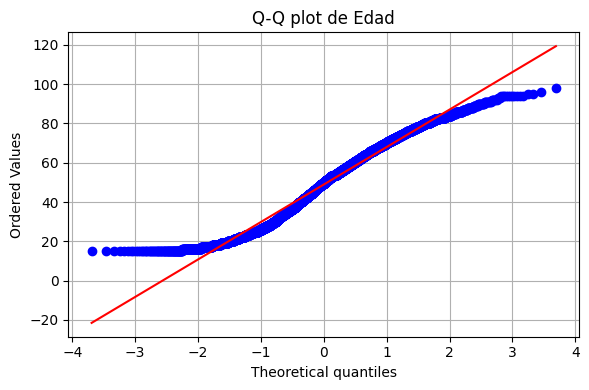

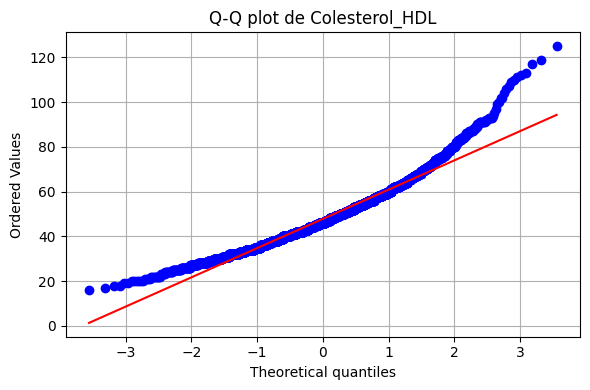

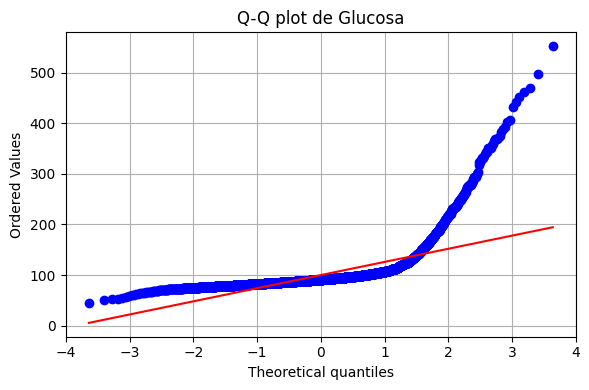

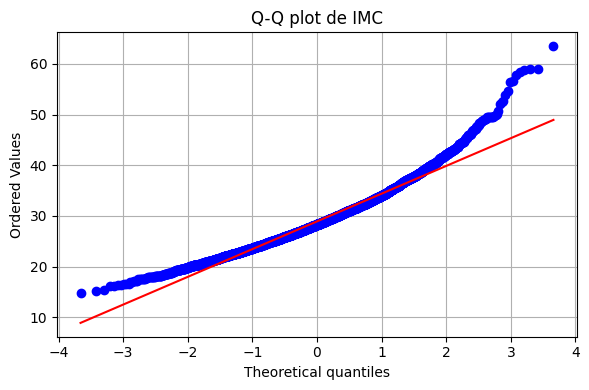

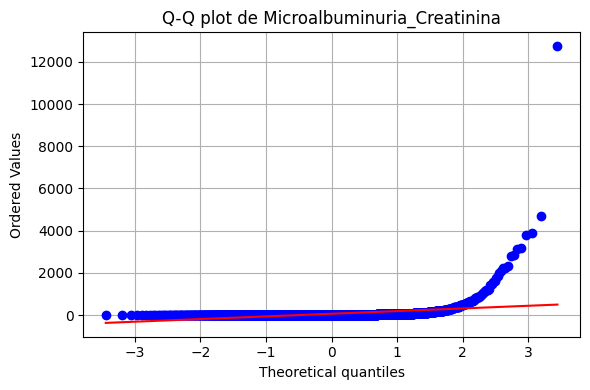

In [101]:
# <CODE>

variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']

for var in variables:
    plt.figure(figsize=(6, 4))
    probplot(ens[var].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q plot de {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 4.1 Teorema del Límite Central (TLC)

El Teorema del Límite Central (TLC) es uno de los conceptos más fundamentales y poderosos de la estadística. Nos dice que:

> Si tomamos muchas muestras aleatorias de una población (de cualquier forma), y calculamos la media de cada muestra, esas medias estarán aproximadamente distribuidas normalmente, independientemente de la forma de la distribución original, siempre que el tamaño de la muestra sea suficientemente grande.

En otras palabras, incluso si los datos originales son sesgados, asimétricos o contienen valores atípicos, la distribución de las medias muestrales se vuelve cada vez más parecida a una campana (distribución normal) a medida que aumenta el tamaño de las muestras. Este fenómeno es clave porque permite aplicar técnicas estadísticas basadas en la normalidad, como intervalos de confianza o pruebas *t*, aun cuando la variable original no sea normal.

#### **Ejercicio 4** 

Utilizando las mismas variables antes trabajadas (`Edad`, `Colesterol_HDL`, `Glucosa`, `IMC`, `Microalbuminuria_Creatinina`), verifica si es posible obtener distribuciones normales mediante el Teorema del Límite Central.

Para esto, debes:

1. Realizar muestreo aleatorio de la variable original, extrayendo muestras de tamaño 5, 10 y 30. *Hint*: utiliza la función `sample` de pandas.
2. Repetir este proceso 500 veces.
3. Formar un nuevo vector con las medias de cada muestra simulada.
4. Evaluar si ese vector sigue una distribución normal:
   * Aplicar la prueba de Shapiro-Wilk.
   * Graficar un Q-Q plot.

Responde:

* ¿Qué ocurre con la normalidad de las medias al aumentar el tamaño de la muestra? ¿Cómo afecta al valor *p*?
* ¿Alguna variable requiere un *n* mayor para aproximarse a la normalidad?
* ¿En qué casos visualmente el Q-Q plot parece normal, pero el *p*-valor de Shapiro indica lo contrario?

In [102]:
# <CODE> 1. Sampling aleatorio y 2. repetir proceso 1000 veces

def simular_medias(data, sample_size=30, n_iter=500):
    data = data.dropna()
    medias = []
    for _ in range(n_iter):
        muestra = data.sample(sample_size, replace=True)
        medias.append(muestra.mean())
    return np.array(medias)

Variable: Edad
  Tamaño muestral: 10
    Shapiro-Wilk p=0.7627 → ✅ Normal


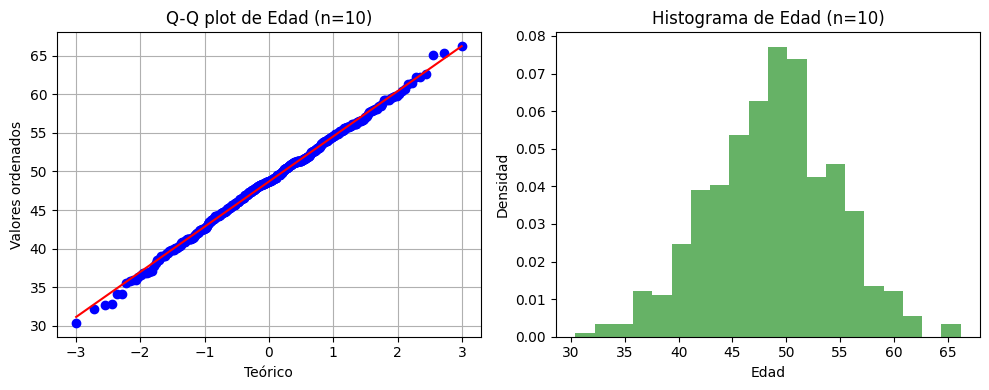

  Tamaño muestral: 30
    Shapiro-Wilk p=0.8071 → ✅ Normal


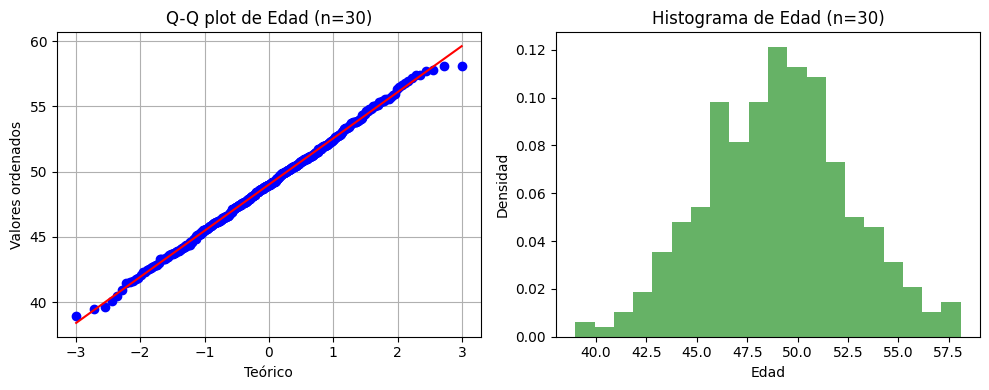

  Tamaño muestral: 50
    Shapiro-Wilk p=0.2774 → ✅ Normal


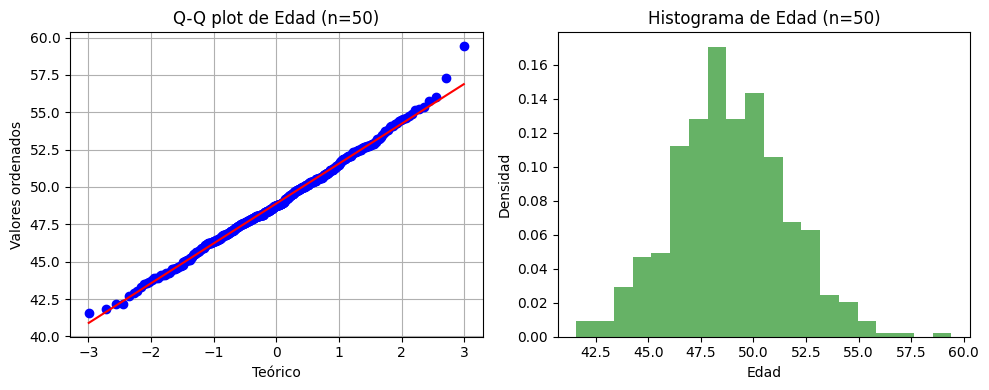

  Tamaño muestral: 100
    Shapiro-Wilk p=0.2866 → ✅ Normal


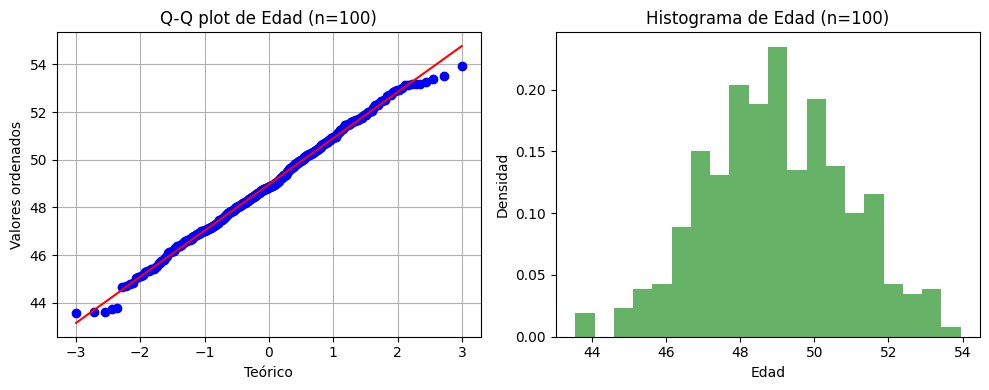

Variable: Colesterol_HDL
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0326 → ❌ No normal


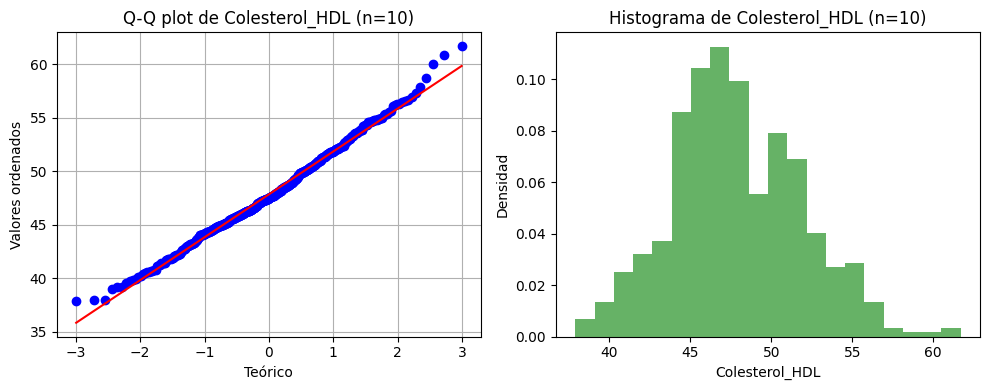

  Tamaño muestral: 30
    Shapiro-Wilk p=0.3942 → ✅ Normal


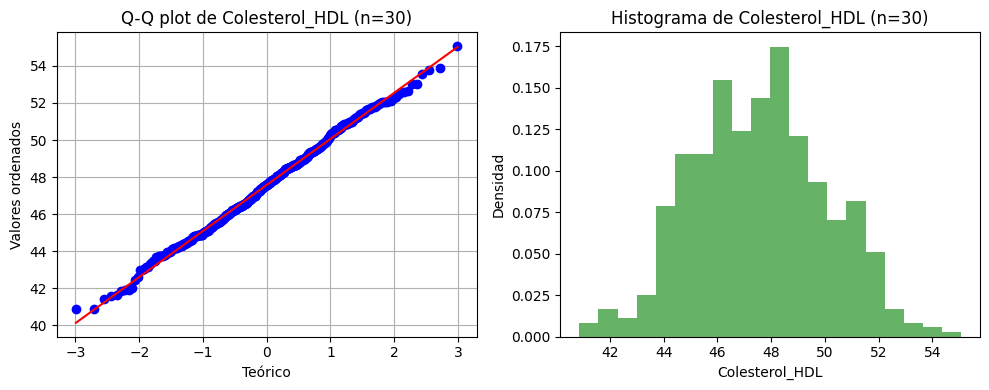

  Tamaño muestral: 50
    Shapiro-Wilk p=0.1496 → ✅ Normal


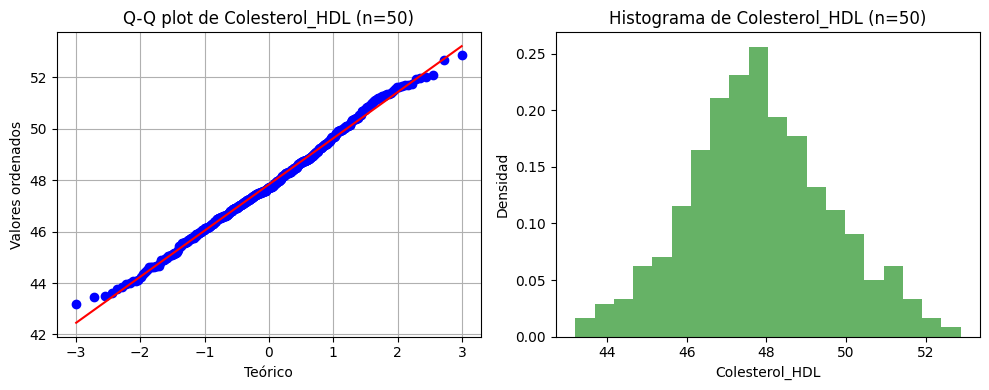

  Tamaño muestral: 100
    Shapiro-Wilk p=0.6817 → ✅ Normal


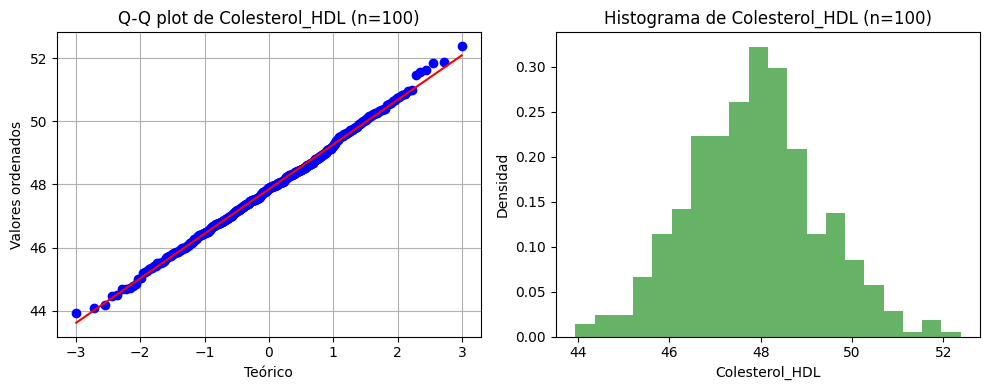

Variable: Glucosa
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0000 → ❌ No normal


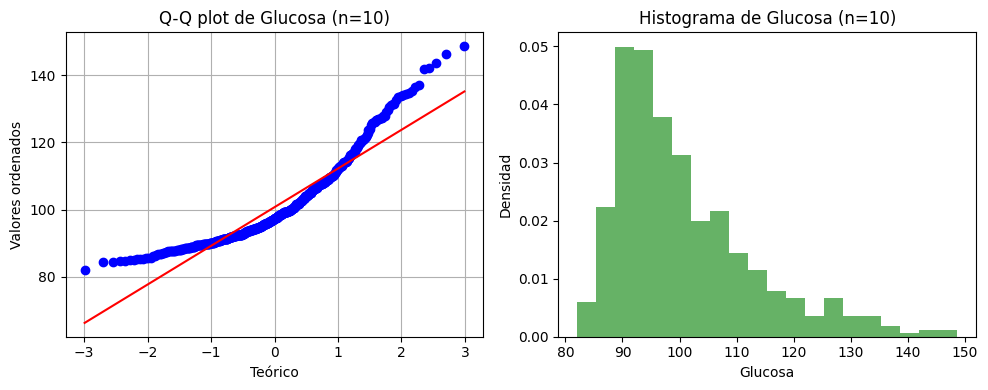

  Tamaño muestral: 30
    Shapiro-Wilk p=0.0000 → ❌ No normal


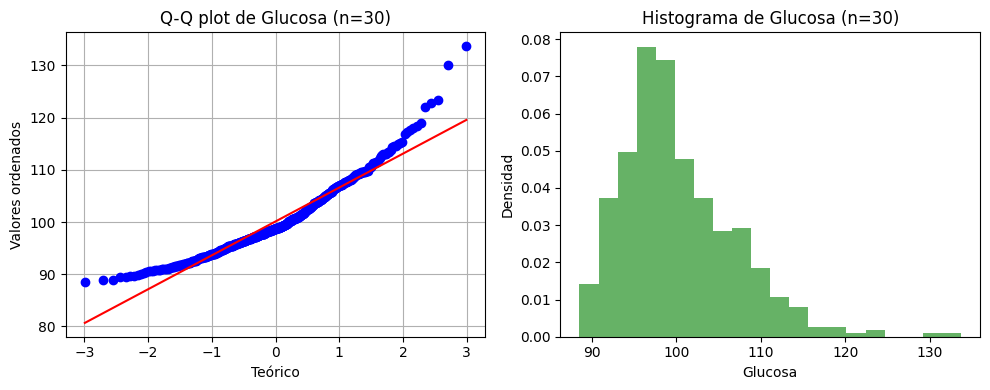

  Tamaño muestral: 50
    Shapiro-Wilk p=0.0000 → ❌ No normal


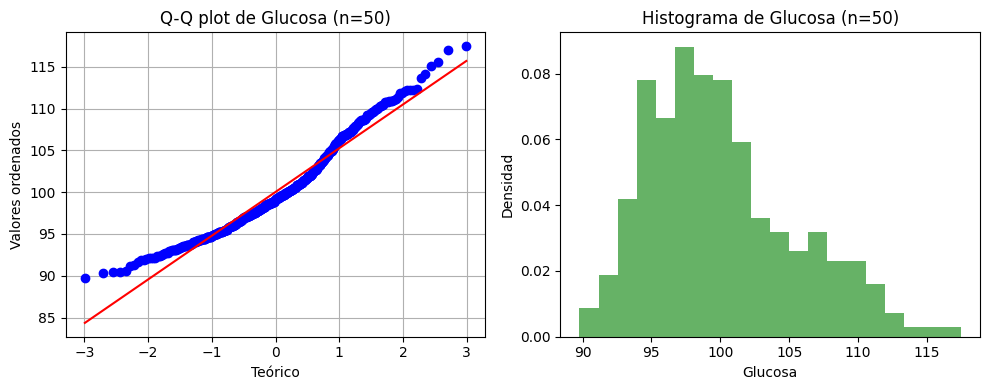

  Tamaño muestral: 100
    Shapiro-Wilk p=0.0018 → ❌ No normal


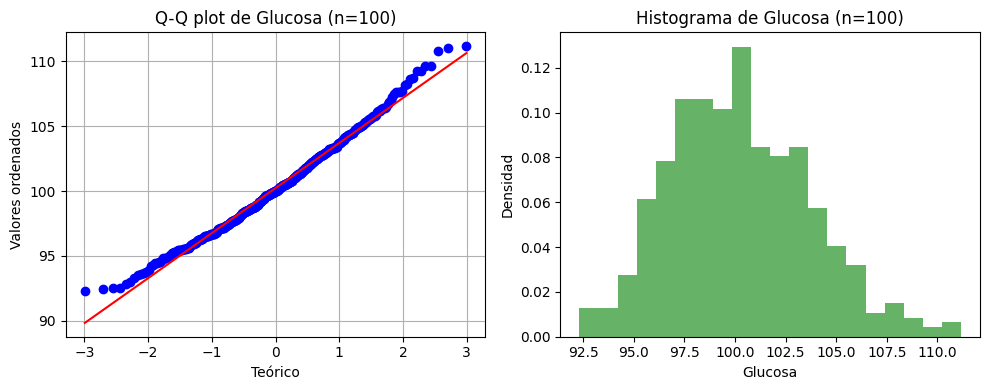

Variable: IMC
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0029 → ❌ No normal


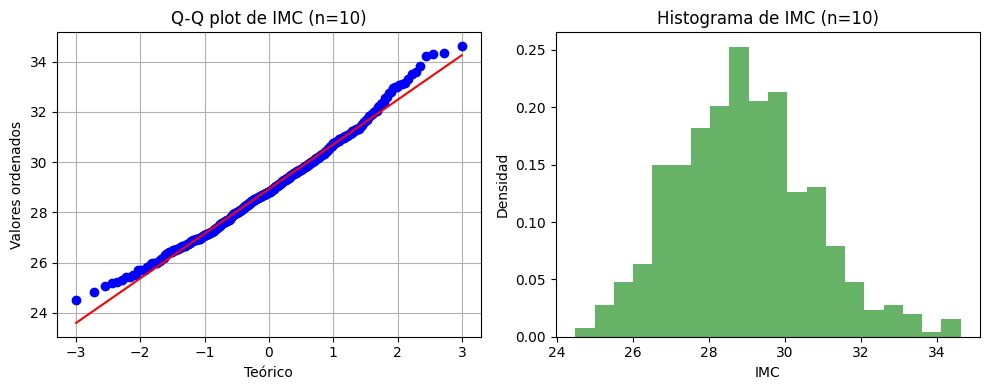

  Tamaño muestral: 30
    Shapiro-Wilk p=0.1334 → ✅ Normal


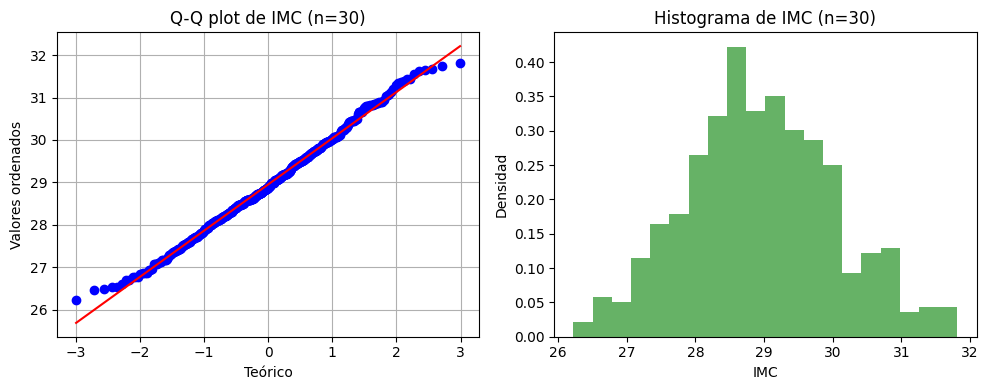

  Tamaño muestral: 50
    Shapiro-Wilk p=0.4743 → ✅ Normal


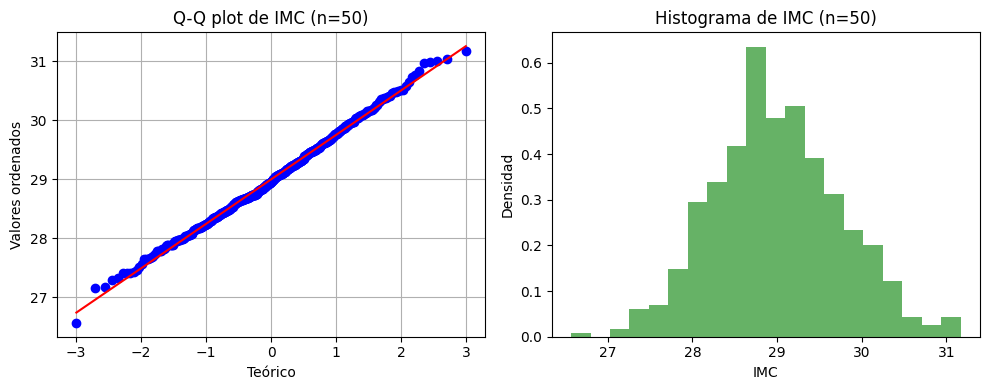

  Tamaño muestral: 100
    Shapiro-Wilk p=0.2810 → ✅ Normal


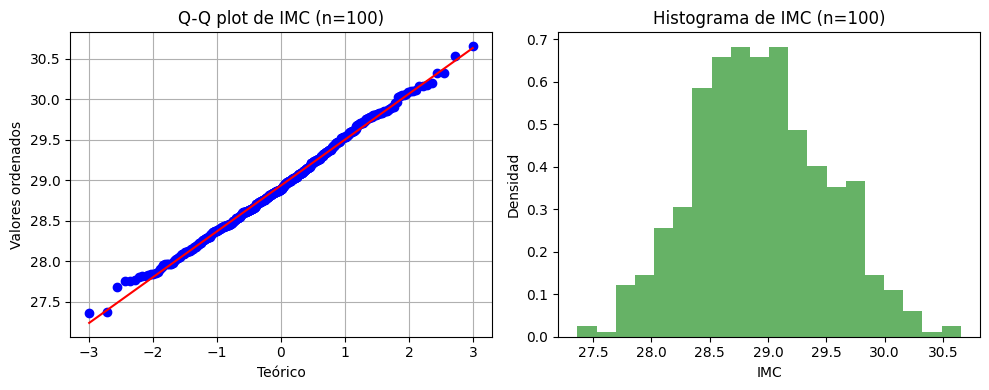

Variable: Microalbuminuria_Creatinina
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0000 → ❌ No normal


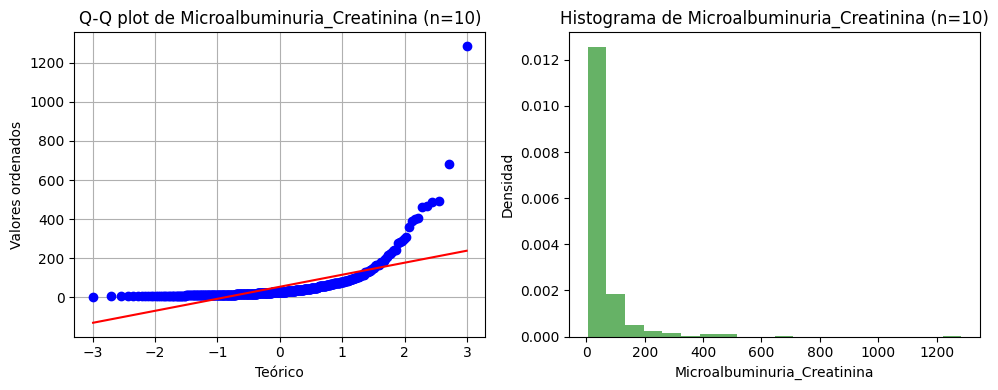

  Tamaño muestral: 30
    Shapiro-Wilk p=0.0000 → ❌ No normal


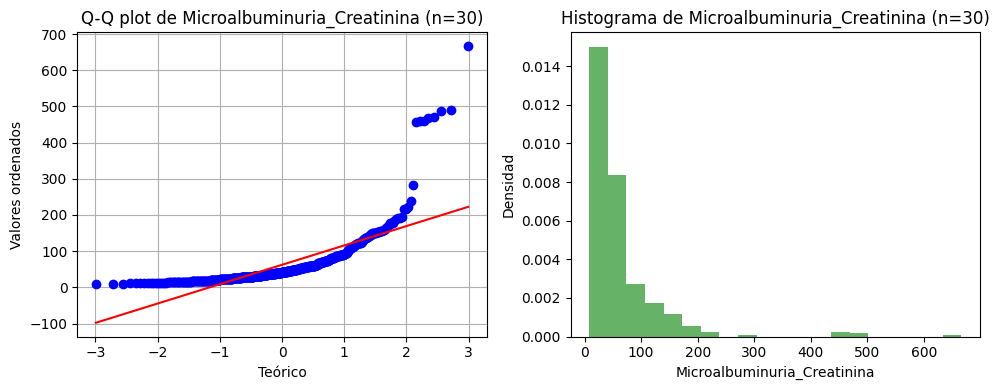

  Tamaño muestral: 50
    Shapiro-Wilk p=0.0000 → ❌ No normal


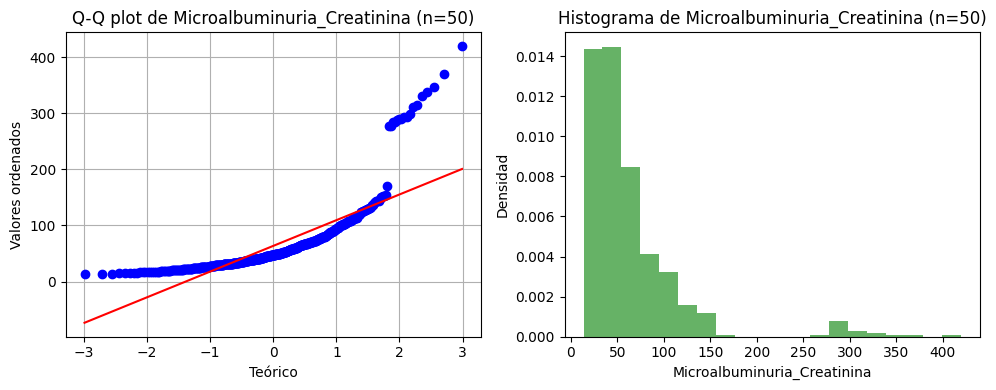

  Tamaño muestral: 100
    Shapiro-Wilk p=0.0000 → ❌ No normal


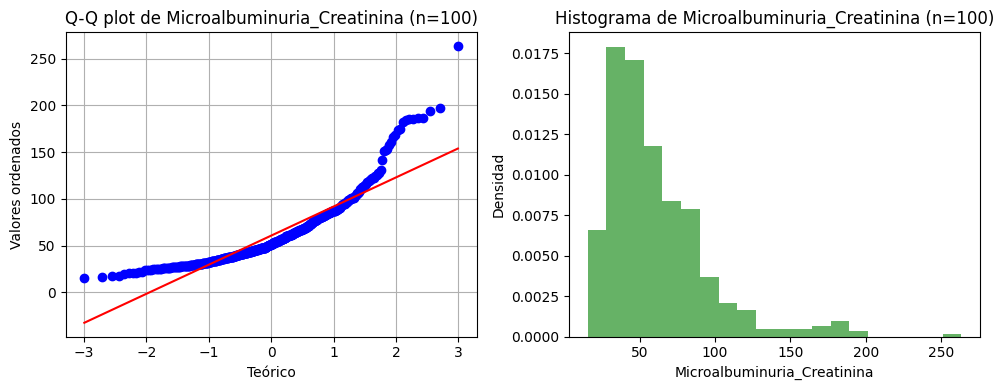

In [113]:
# <CODE> 3. Formar nuevo vector

variables = ['Edad', 'Colesterol_HDL', 'Glucosa', 'IMC', 'Microalbuminuria_Creatinina']
tamaños = [10, 30, 50, 100]

for var in variables:
    print("="*20)
    print(f"Variable: {var}")
    
    for n in tamaños:
        print(f"  Tamaño muestral: {n}")
        medias = simular_medias(ens[var], sample_size=n)
        
        # Test de normalidad Shapiro-Wilk
        stat, p = shapiro(medias)
        resultado = "✅ Normal" if p > 0.05 else "❌ No normal"
        print(f"    Shapiro-Wilk p={p:.4f} → {resultado}")
        
        # Q-Q plot
        fig, ax = plt.subplots(1,2, figsize=(10, 4))
        probplot(medias, dist="norm", plot=ax[0])
        ax[0].set_title(f"Q-Q plot de {var} (n={n})")
        ax[0].grid(True)
        ax[0].set_xlabel('Teórico')
        ax[0].set_ylabel('Valores ordenados')

        # Histograma
        ax[1].hist(medias, bins=20, density=True, alpha=0.6, color='g')
        ax[1].set_title(f"Histograma de {var} (n={n})")
        ax[1].set_xlabel(var)
        ax[1].set_ylabel('Densidad')
        plt.tight_layout()
        plt.show()

        

A partir de los gráficos anteriores, se observa que la variable microalbuminuria presenta un fuerte sesgo hacia la izquierda, incluso después de aplicar el Teorema del Límite Central. Esto también se evidencia en el histograma original, donde los valores se concentran cerca de cero. Para poder trabajar adecuadamente con esta variable, es necesario aplicar una transformación que la aproxime a una distribución normal. Una de las más comunes en estos casos es la transformación logarítmica.






#### **Ejercicio**

Al igual que en el ejercicio anterior, pero ahora aplica una transformación logarítmica a la variable `Microalbuminuria_Creatinina` y repite el proceso de muestreo aleatorio y análisis de normalidad solo para esta variable. Responde:
* ¿Cómo afecta la transformación logarítmica a la normalidad de la variable?
* ¿Qué cambios observas en el histograma y el Q-Q plot después de la transformación?
* ¿La transformación logra que la variable se asemeje más a una distribución normal?


Variable: Microalbuminuria_Creatinina
  Tamaño muestral: 10
    Shapiro-Wilk p=0.0185 → ❌ No normal


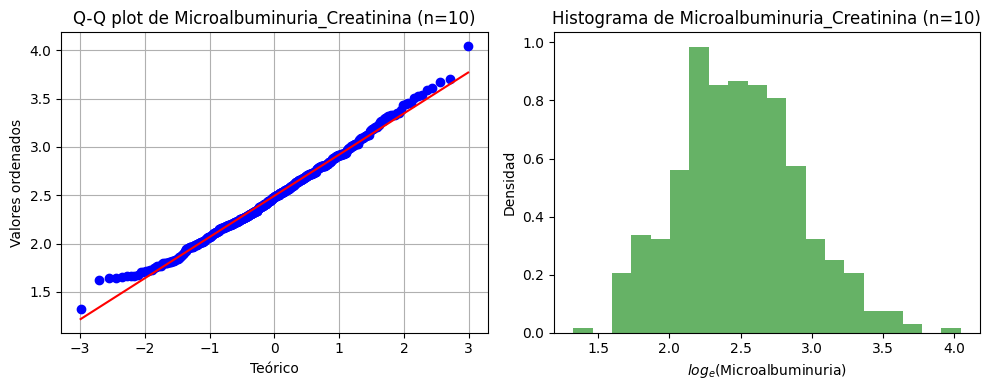

  Tamaño muestral: 30
    Shapiro-Wilk p=0.0023 → ❌ No normal


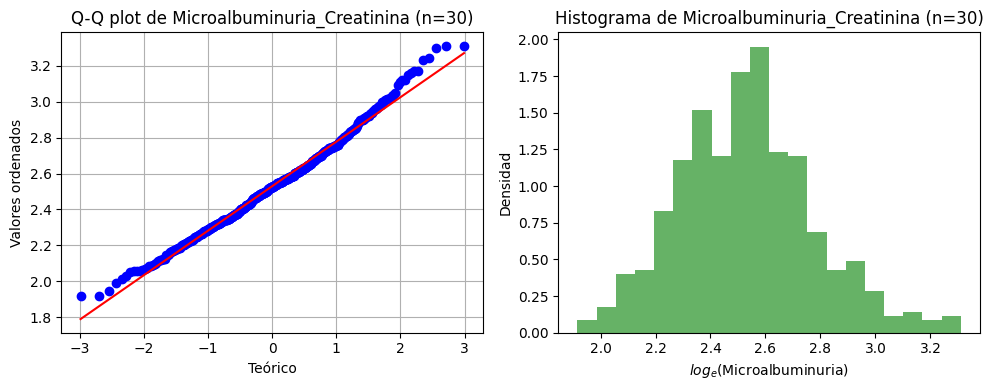

  Tamaño muestral: 50
    Shapiro-Wilk p=0.0102 → ❌ No normal


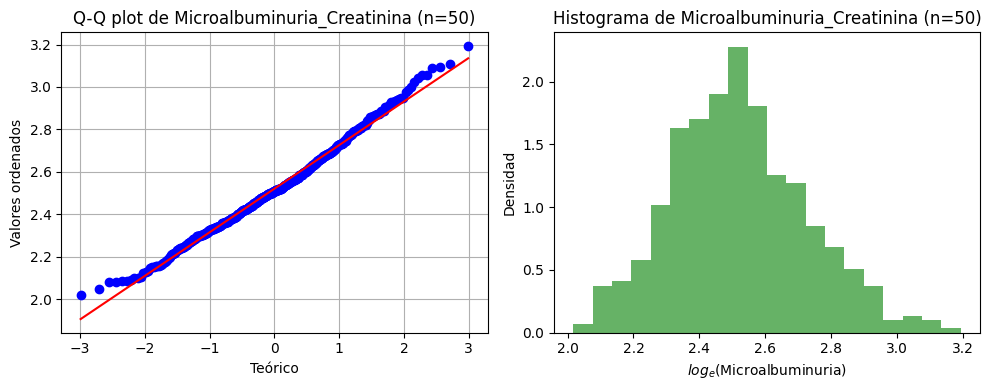

  Tamaño muestral: 100
    Shapiro-Wilk p=0.5735 → ✅ Normal


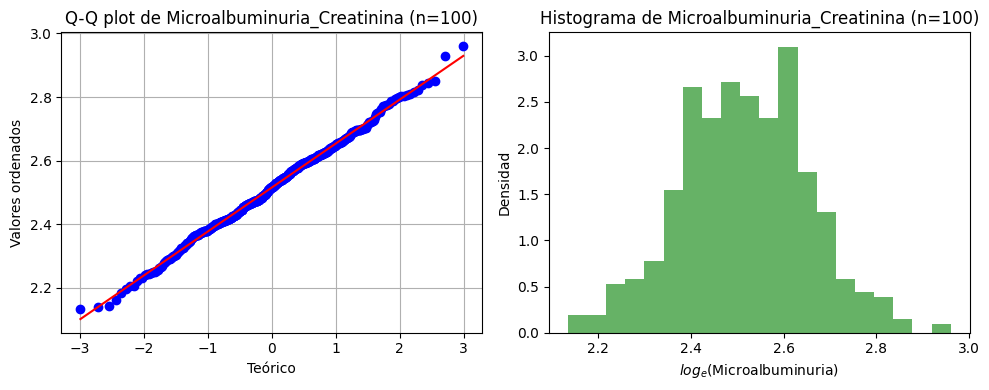

In [115]:
# <CODE>

variables = ['Microalbuminuria_Creatinina']
tamaños = [10, 30, 50, 100]

for var in variables:
    print("="*20)
    print(f"Variable: {var}")
    
    for n in tamaños:
        print(f"  Tamaño muestral: {n}")
        medias = simular_medias(np.log(ens[var]), sample_size=n)
        
        # Test de normalidad Shapiro-Wilk
        stat, p = shapiro(medias)
        resultado = "✅ Normal" if p > 0.05 else "❌ No normal"
        print(f"    Shapiro-Wilk p={p:.4f} → {resultado}")
        
        # Q-Q plot
        fig, ax = plt.subplots(1,2, figsize=(10, 4))
        probplot(medias, dist="norm", plot=ax[0])
        ax[0].set_title(f"Q-Q plot de {var} (n={n})")
        ax[0].grid(True)
        ax[0].set_xlabel('Teórico')
        ax[0].set_ylabel('Valores ordenados')

        # Histograma
        ax[1].hist(medias, bins=20, density=True, alpha=0.6, color='g')
        ax[1].set_title(f"Histograma de {var} (n={n})")
        ax[1].set_xlabel(f'$log_e$(Microalbuminuria)')
        ax[1].set_ylabel('Densidad')
        plt.tight_layout()
        plt.show()


### 4.2 Comparación entre grupos (variables continuas)

En esta sección aplicaremos pruebas estadísticas para comparar grupos en relación con variables continuas, como el peso, IMC, glicemia o colesterol. Estas comparaciones nos permiten evaluar si existen diferencias significativas entre grupos, por ejemplo:

* ¿Tienen las mujeres un IMC promedio diferente al de los hombres?
* ¿Varía la glicemia entre personas con y sin educación superior?
* ¿Existen diferencias regionales en los niveles de colesterol?

Para responder estas preguntas, utilizamos herramientas estadísticas basadas en el planteamiento de una hipótesis nula (H₀).

> **Hipótesis nula (H₀):**  
> Supone que no hay diferencia entre los grupos.  
> Por ejemplo: “El IMC promedio en hombres y mujeres es igual”.

Al aplicar una prueba estadística, como la prueba *t* de Student o ANOVA, calculamos un *p*-valor que nos indica cuán probable sería observar los datos que tenemos si la hipótesis nula fuera cierta.

* Si el *p*-valor es menor a 0.05, se considera que existe evidencia suficiente para rechazar la hipótesis nula y concluir que hay una diferencia significativa.
* Si el *p*-valor es mayor a 0.05, no se rechaza la hipótesis nula; es decir, no se observan diferencias estadísticamente significativas.

En esta sección aplicaremos estas pruebas paso a paso según el tipo de variable y número de grupos, y discutiremos cómo interpretar los resultados correctamente en el contexto de datos reales.

#### **Ejercicio 5** 

Aplica pruebas estadísticas para comprobar si existen diferencias significativas en el `IMC` y `Glucosa` entre hombres y mujeres.

**Pasos:**

1. Verifica que las variables `IMC` y `Glucosa` estén registradas como numéricas. *Hint*: puedes usar la función `describe` de pandas.
2. Plantea la hipótesis estadística ($H_0$ y $H_1$). Puedes expresarla en texto.
3. Realiza un test de normalidad para cada grupo (hombres y mujeres) de las variables `IMC` y `Glucosa`. Utiliza el test de Shapiro-Wilk.
4. ¿Es posible realizar un *t*-test?
5. Si es posible, realiza un *t*-test para cada variable y responde:
   * ¿Qué conclusiones puedes sacar de los resultados?
6. Grafica los resultados de las pruebas realizadas. Utiliza *boxplots* y/o *violin plots* para visualizar la distribución de `IMC` y `Glucosa` por género.

In [94]:
# <CODE> 1. verificar variables
print(ens['IMC'].describe())
print(ens['Glucosa'])

count    5426.000000
mean       28.928635
std         5.579977
min        14.756944
25%        25.060254
50%        28.308947
75%        32.013251
max        63.510653
Name: IMC, dtype: float64
0         NaN
1        79.0
2        78.0
3       101.0
4         NaN
        ...  
6228    120.0
6229     80.0
6230    281.0
6231     65.0
6232     88.0
Name: Glucosa, Length: 6168, dtype: float64


In [40]:
# <CODE> 2. Plantear hipotesis
print("Hipótesis nula (H0): La media en hombres y mujeres es igual.")
print("Hipótesis alternativa (H1): La media en hombres y mujeres es distinta.")

Hipótesis nula (H0): La media en hombres y mujeres es igual.
Hipótesis alternativa (H1): La media en hombres y mujeres es distinta.


In [41]:
# <CODE> 3. Verificar normalidad

def simular_medias(data, sample_size=30, n_iter=500):
    data = data.dropna()
    medias = []
    for _ in range(n_iter):
        muestra = data.sample(sample_size, replace=True)
        medias.append(muestra.mean())
    return np.array(medias)

for var in ['IMC', 'Glucosa']:
    print("="*10)
    print(f"Variable: {var}")
    for grupo in ['HOMBRE', 'MUJER']:
        datos = ens[ens["Sexo"] == grupo][var].dropna()
        print(f"{grupo}: n={len(datos)}")
        stat, p = shapiro(datos)
        print(f"  Shapiro-Wilk p={p:.4f} → {'Normal' if p > 0.05 else 'No normal'}")


print("Dado que el tamaño de muestra es mayor a 30, podemos aplicar el Teorema del Límite Central. Por lo tanto, podemos asumir que las medias muestrales siguen una distribución normal.")





Variable: IMC
HOMBRE: n=2004
  Shapiro-Wilk p=0.0000 → No normal
MUJER: n=3479
  Shapiro-Wilk p=0.0000 → No normal
Variable: Glucosa
HOMBRE: n=1887
  Shapiro-Wilk p=0.0000 → No normal
MUJER: n=3230
  Shapiro-Wilk p=0.0000 → No normal
Dado que el tamaño de muestra es mayor a 30, podemos aplicar el Teorema del Límite Central. Por lo tanto, podemos asumir que las medias muestrales siguen una distribución normal.


In [ ]:
# <CODE> 5. Aplicar prueba t de Student
from scipy.stats import ttest_ind

for var in ['IMC', 'Glucosa']:
    grupo1 = ens[ens["Sexo"] == "HOMBRE"][var].dropna()
    grupo2 = ens[ens["Sexo"] == "MUJER"][var].dropna()
    
    stat, p = ttest_ind(grupo1, grupo2, equal_var=False)  # Welch t-test
    print(f"Comparación de {var}")
    print(f" t = {stat:.2f}, p = {p:.4f} → {'Diferencia significativa' if p < 0.05 else 'No significativa'}")

Comparación de IMC
 t = -8.69, p = 0.0000 → Diferencia significativa
Comparación de Glucosa
 t = 1.29, p = 0.1966 → No significativa


/var/folders/rx/63h8zdt13bq9p75883lz1jlh0000gn/T/ipykernel_85124/1375972838.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])
/var/folders/rx/63h8zdt13bq9p75883lz1jlh0000gn/T/ipykernel_85124/1375972838.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])


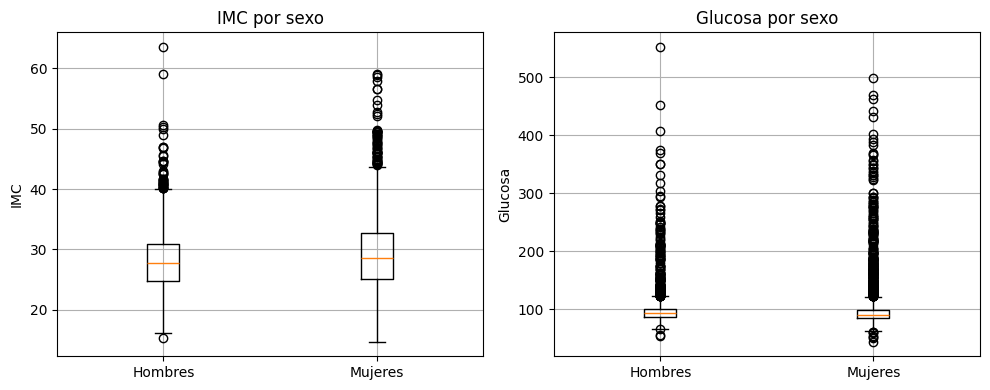

In [ ]:
# <CODE> 5. Graficar resultados
plt.figure(figsize=(10, 4))

for i, var in enumerate(['IMC', 'Glucosa']):
    hombres = ens[ens["Sexo"] == "HOMBRE"][var].dropna()
    mujeres = ens[ens["Sexo"] == "MUJER"][var].dropna()
    
    plt.subplot(1, 2, i + 1)
    plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])
    plt.title(f"{var} por sexo")
    plt.ylabel(var)
    plt.grid(True)

plt.tight_layout()
plt.show()

### 4.3 Comparación entre grupos (variables categóricas)

En esta sección aplicaremos pruebas estadísticas para comparar grupos según variables categóricas, es decir, aquellas que representan clasificaciones o categorías como:

* Sexo (Hombre / Mujer)  
* Nivel educacional (Básico / Medio / Superior)  
* Presencia de comorbilidades (Sí / No)  
* Región geográfica (Norte / Centro / Sur)

Para este tipo de variables no podemos calcular promedios ni aplicar pruebas como el *t*-test. En su lugar, usamos herramientas como:

* Tablas de contingencia para visualizar la distribución conjunta de dos variables.
* La prueba de Chi-cuadrado para determinar si existe una asociación significativa entre ellas.

> **Hipótesis nula (H₀):** Las variables categóricas no están asociadas, es decir, son independientes.  
> Un *p*-valor bajo (p < 0.05) nos permite rechazar H₀ y concluir que existe una asociación estadísticamente significativa entre las variables.

Este tipo de análisis es fundamental para explorar relaciones entre factores demográficos, sociales y de salud, y detectar desigualdades o patrones relevantes en los datos.

#### **Ejercicio 6** 

Evalúa si existe una asociación entre el sexo (`Sexo`) y el haber fumado más de 100 cigarrillos en la vida (`ta2`). Para esto, debes:

1. Plantear la hipótesis estadística ($H_0$ y $H_1$). Puedes expresarla en texto.
2. Explorar los datos para entender la distribución de las variables involucradas. Utiliza la función `describe` de pandas. Elimina los valores donde `ta2` sea `NaN` o las respuestas sean "No está seguro" o "No recuerda".
3. Construir una tabla de contingencia para visualizar la relación entre `Sexo` y `ta2`.
4. Realizar la prueba de Chi-cuadrado para evaluar la asociación entre las variables.
5. Interpretar los resultados:
   * ¿Qué conclusiones puedes sacar del *p*-valor obtenido?
   * ¿Qué implicaciones tiene esta asociación en el contexto del estudio?

In [95]:
# <CODE> 1. Plantear hipótesis
print("Hipótesis nula (H0): No hay diferencia entre el sexo y el haber fumado cigarrillos.")
print("Hipótesis alternativa (H1): Hay diferencia entre el sexo y el haber fumado cigarrillos.")

Hipótesis nula (H0): No hay diferencia entre el sexo y el haber fumado cigarrillos.
Hipótesis alternativa (H1): Hay diferencia entre el sexo y el haber fumado cigarrillos.


In [ ]:
# <CODE> 2. Explorar variables
print(ens["Sexo"].value_counts(dropna=False))
print(ens["ta2"].value_counts(dropna=False))

# Eliminar filas que no sean SI o NO
ens = ens[ens["ta2"].isin(["SÍ", "NO"])]

print(ens["Sexo"].value_counts(dropna=False))
print(ens["ta2"].value_counts(dropna=False))

Sexo
MUJER     3876
HOMBRE    2292
Name: count, dtype: int64
ta2
NO                3563
SÍ                2605
NO ESTÁ SEGURO       0
NO RECUERDA          0
Name: count, dtype: int64
Sexo
MUJER     3876
HOMBRE    2292
Name: count, dtype: int64
ta2
NO                3563
SÍ                2605
NO ESTÁ SEGURO       0
NO RECUERDA          0
Name: count, dtype: int64


In [ ]:
# <CODE> 3. Tabla de contingencia
tabla = pd.crosstab(ens["Sexo"], ens["ta2"])
print("Tabla de contingencia (Sexo vs Tabaquismo):")
print(tabla)

tabla_pct = tabla.div(tabla.sum(axis=1), axis=0).round(3) * 100
print("Porcentaje de fumadores por sexo:")
print(tabla_pct)

Tabla de contingencia (Sexo vs Tabaquismo):
ta2       NO    SÍ
Sexo              
HOMBRE  1125  1167
MUJER   2438  1438
Porcentaje de fumadores por sexo:
ta2       NO    SÍ
Sexo              
HOMBRE  49.1  50.9
MUJER   62.9  37.1


In [69]:
# <CODE> 4. Chi-cuadrado de independencia
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla)

print(f"Estadístico Chi-cuadrado = {chi2:.2f}")
print(f"p-valor = {p}")
print(f"Grados de libertad = {dof}")

if p < 0.05:
    print("❗ Existe una asociación significativa entre el sexo y el tabaquismo.")
else:
    print("✅ No hay evidencia suficiente para afirmar que existe una asociación entre el sexo y el tabaquismo.")


Estadístico Chi-cuadrado = 112.13
p-valor = 3.352949189959162e-26
Grados de libertad = 1
❗ Existe una asociación significativa entre el sexo y el tabaquismo.


#### **Ejercicio**

Se analizo anteriormente como la variable `Microalbuminuria_Creatinina` presentaba un sesgo hacia la izquierda, lo que dificultaba su normalidad. Ahora, se desea evaluar si existe una asociación entre el nivel de microalbuminuria y el género (`Sexo`). El test de Mann-Whitney U es adecuado para comparar dos grupos independientes cuando la variable de interés no sigue una distribución normal. 
Para este ejercicio, debes:
1. Plantear la hipótesis estadística ($H_0$ y $H_1$). Puedes expresarla en texto.
2. Filtrar los datos para eliminar valores `NaN` en la variable `Microalbuminuria_Creatinina`.
3. Realiza el test de Mann-Whitney U para comparar los niveles de microalbuminuria entre hombres y mujeres.
4. Interpretar los resultados:
    * ¿Qué conclusiones puedes sacar del *p*-valor obtenido?
5. Visualizar los resultados utilizando un *boxplot* o *violin plot* para comparar la distribución de microalbuminuria entre hombres y mujeres.


In [184]:
# <CODE> 1. Plantear hipótesis
print("Hipótesis nula (H0): No hay diferencias en los niveles de microalbuminuria entre hombres y mujeres.")
print("Hipótesis alternativa (H1): Hay diferencias en los niveles de microalbuminuria entre hombres y mujeres.")


Hipótesis nula (H0): No hay diferencias en los niveles de microalbuminuria entre hombres y mujeres.
Hipótesis alternativa (H1): Hay diferencias en los niveles de microalbuminuria entre hombres y mujeres.


In [185]:
# <CODE> 2. Filtrar datos
hombres = ens[ens["Sexo"] == "HOMBRE"]["Microalbuminuria_Creatinina"].dropna()
mujeres = ens[ens["Sexo"] == "MUJER"]["Microalbuminuria_Creatinina"].dropna()

In [186]:
# <CODE> 3. Realizar el test de Mann-Whitney U
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(hombres, mujeres, alternative='two-sided')
print(f"Estadístico U = {stat:.2f}, p-valor = {p:.4f}")
if p < 0.05:
    print("Existe una diferencia significativa en los niveles de microalbuminuria entre hombres y mujeres.")
else:
    print("No hay evidencia suficiente para afirmar que existe una diferencia significativa en los niveles de microalbuminuria entre hombres y mujeres.")


Estadístico U = 648218.50, p-valor = 0.0020
Existe una diferencia significativa en los niveles de microalbuminuria entre hombres y mujeres.


/var/folders/rx/63h8zdt13bq9p75883lz1jlh0000gn/T/ipykernel_85124/4077997432.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])


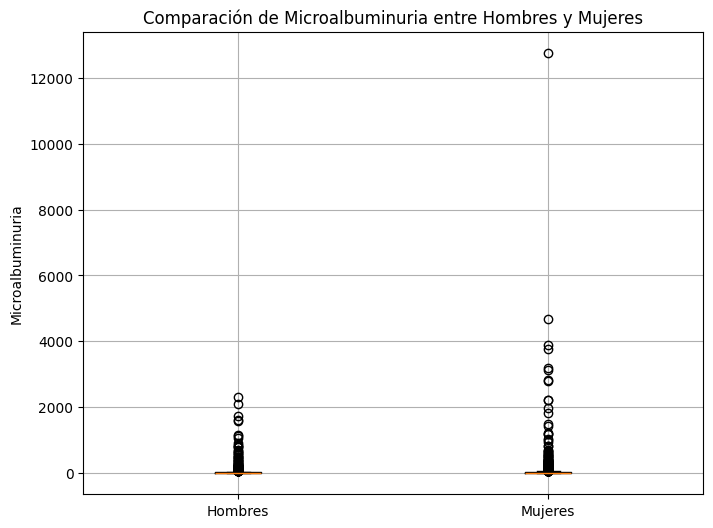

In [187]:
# <CODE> 5. Visualizar resultados matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot([hombres, mujeres], labels=["Hombres", "Mujeres"])
plt.title("Comparación de Microalbuminuria entre Hombres y Mujeres")
plt.ylabel("Microalbuminuria")
plt.grid(True)
plt.show()

## 5. ANOVA: Comparación de más de dos grupos
ANOVA (Análisis de Varianza) es una técnica estadística utilizada para comparar las medias de una variable continua entre tres o más grupos independientes.

A diferencia del t-test, que solo compara dos grupos, ANOVA nos permite saber si al menos uno de los grupos tiene una media significativamente distinta sin necesidad de hacer múltiples t-tests (lo que aumentaría el riesgo de error tipo I).

>Hipótesis nula (H₀): Todas las medias poblacionales son iguales.
>Hipótesis alternativa (H₁): Al menos una media es diferente.

### ¿Qué asume ANOVA?

Antes de aplicar ANOVA, se deben cumplir ciertas condiciones:
* Las observaciones son independientes.
* Las distribuciones son aproximadamente normales (aunque ANOVA es robusto si los tamaños muestrales son grandes).
* Las varianzas son similares entre los grupos (homocedasticidad).

Si se encuentra una diferencia significativa, se puede continuar con pruebas post hoc (como Tukey) para identificar cuáles grupos difieren entre sí.

#### **Ejercicio 7** 

Evalua si existen diferencias significativas en el IMC entre personas de tres zonas del pais: Norte, Centro y Sur. Para esto, debes:
1. Plantear la hipótesis estadística ($H_0$ y $H_1$). Puedes dejarla expresada mediante texto.
2. Explorar los datos para entender la distribución de las variables involucradas. Utiliza la función `describe` de pandas. Crear la variable `Zona_geo` con los valores "Norte", "Centro" y "Sur" según la región de residencia.
3. Verificar el tamaño de la muestra por grupo.
4. Realizar el test de ANOVA para evaluar si hay diferencias significativas en el IMC entre las zonas geográficas. HINT: utiliza la función `f_oneway` de `scipy.stats`.
5. Grafique e interprete los resultados:
   * ¿Qué conclusiones puedes sacar del p-valor obtenido?
   * ¿Qué implicaciones tiene esta diferencia en el contexto del estudio?  
6. Si el ANOVA es significativo, realizar un test post hoc (como Tukey) para identificar qué grupos difieren entre sí. HINT: puedes utilizar la función `pairwise_tukeyhsd` de `statsmodels`.


In [104]:
# <CODE> 1. Plantear hipótesis
print("Hipótesis nula (H0): No hay diferencias regionales en el IMC.")
print("Hipótesis alternativa (H1): Hay diferencias regionales en el IMC.")

Hipótesis nula (H0): No hay diferencias regionales en el IMC.
Hipótesis alternativa (H1): Hay diferencias regionales en el IMC.


In [105]:
# <CODE> 2. Crear variable Zona_Geografica

print(ens["Region"].value_counts(dropna=False))


zona_dict = {
    'I. Tarapacá': 'Norte',
    'II. Antofagasta': 'Norte',
    'III. Atacama': 'Norte',
    'XV. Arica y Parinacota': 'Norte',

    'IV. Coquimbo': 'Centro',
    'V. Valparaíso': 'Centro',
    'VI. L. Bdo. OHiggins': 'Centro',
    'VII. Maule': 'Centro',
    'XIII. Metropolitana': 'Centro',

    'VIII. Bíobío': 'Sur',
    'IX. La Araucanía': 'Sur',
    'X. Los Lagos': 'Sur',
    'XI. Aysén': 'Sur',
    'XII. Magallanes y Antártica': 'Sur',
    'XIV. Los Ríos': 'Sur'
}

# Crear nueva columna 'Zona'
ens["Zona_geo"] = ens["Region"].map(zona_dict)
print(ens["Zona_geo"].value_counts(dropna=False))

Region
XIII. Metropolitana            912
V. Valparaíso                  668
VIII. Bíobío                   661
VII. Maule                     369
XV. Arica y Parinacota         359
X. Los Lagos                   346
I. Tarapacá                    341
II. Antofagasta                338
IV. Coquimbo                   330
VI. L. Bdo. OHiggins           328
XI. Aysén                      327
XIV. Los Ríos                  323
IX. La Araucanía               322
XII. Magallanes y Antártica    305
III. Atacama                   304
Name: count, dtype: int64
Zona_geo
Centro    2607
Sur       2284
Norte     1342
Name: count, dtype: int64


In [ ]:
# <CODE> 3. Verificar el tamaño de la muestra de IMC por zona_geo
print(ens.groupby("Zona_geo")["IMC"].count())

print("Promedio de IMC por zona_geo:")
ens.groupby("Zona_geo")["IMC"].mean()

Zona_geo
Centro    2305
Norte     1114
Sur       2007
Name: IMC, dtype: int64
Promedio de IMC por zona_geo:


Zona_geo
Centro    28.547857
Norte     28.479211
Sur       29.615408
Name: IMC, dtype: float64

In [ ]:
# <CODE> 4. Aplicar ANOVA
from scipy.stats import f_oneway

grupo_norte = ens[ens["Zona_geo"] == "Norte"]["IMC"].dropna()
grupo_centro = ens[ens["Zona_geo"] == "Centro"]["IMC"].dropna()
grupo_sur = ens[ens["Zona_geo"] == "Sur"]["IMC"].dropna()

stat, p = f_oneway(grupo_norte, grupo_centro, grupo_sur)

print(f"ANOVA F = {stat:.2f}")
print(f"p-valor = {p} → {'Diferencia significativa' if p < 0.05 else 'No significativa'}")

ANOVA F = 24.39
p-valor = 2.8507580396108435e-11 → Diferencia significativa


<Figure size 600x500 with 0 Axes>

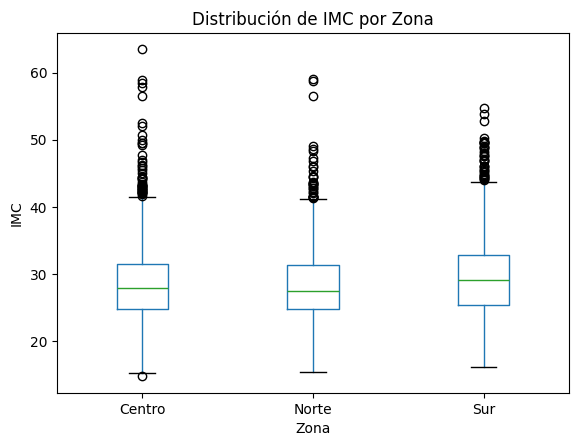

In [ ]:
# <CODE> 5. Visualizar resultados
import matplotlib.pyplot as pltc

plt.figure(figsize=(6, 5))
ens.boxplot(column="IMC", by="Zona_geo", grid=False)
plt.title("Distribución de IMC por Zona")
plt.suptitle("")
plt.xlabel("Zona")
plt.ylabel("IMC")
plt.show()

In [93]:
# <CODE> 6. Prueba de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=ens["IMC"].dropna(),
                          groups=ens["Zona_geo"][ens["IMC"].notna()],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Centro  Norte  -0.0686 0.9388 -0.5439 0.4066  False
Centro    Sur   1.0676    0.0  0.6699 1.4652   True
 Norte    Sur   1.1362    0.0  0.6495 1.6229   True
---------------------------------------------------


#### **Ejercicio**

Estás llevando a cabo un estudio sobre los niveles de colesterol LDL y la región geográfica de residencia. Se plantea la hipótesis de que el colesterol LDL promedio varía entre las regiones Norte, Centro y Sur del país. Evalúa si esta hipótesis es correcta y, en caso afirmativo, ¿cuál de las regiones presenta el colesterol LDL promedio más alto?


In [165]:
# <CODE> 1. Plantear hipótesis
print("Hipótesis nula (H0): No hay diferencias en el colesterol LDL entre las regiones Norte, Centro y Sur.")
print("Hipótesis alternativa (H1): Hay diferencias en el colesterol LDL entre al menos dos regiones.")

Hipótesis nula (H0): No hay diferencias en el colesterol LDL entre las regiones Norte, Centro y Sur.
Hipótesis alternativa (H1): Hay diferencias en el colesterol LDL entre al menos dos regiones.


In [166]:
# <CODE> 2. Verificar tamaño de muestra
print(ens.groupby("Zona_geo")["Colesterol_LDL_Calculado"].count())
print(ens.groupby("Zona_geo")["Colesterol_LDL_Calculado"].mean())


Zona_geo
Centro    1570
Norte      762
Sur       1358
Name: Colesterol_LDL_Calculado, dtype: int64
Zona_geo
Centro    102.897452
Norte     103.480315
Sur       107.868925
Name: Colesterol_LDL_Calculado, dtype: float64


In [167]:

# <CODE> 3. Aplicar ANOVA
from scipy.stats import f_oneway
grupo_norte = ens[ens["Zona_geo"] == "Norte"]["Colesterol_LDL_Calculado"].dropna()
grupo_centro = ens[ens["Zona_geo"] == "Centro"]["Colesterol_LDL_Calculado"].dropna()
grupo_sur = ens[ens["Zona_geo"] == "Sur"]["Colesterol_LDL_Calculado"].dropna()
stat, p = f_oneway(grupo_norte, grupo_centro, grupo_sur)
print(f"ANOVA F = {stat:.2f}")
print(f"p-valor = {p} → {'Diferencia significativa' if p < 0.05 else 'No significativa'}")


ANOVA F = 8.75
p-valor = 0.00016203836741493898 → Diferencia significativa


<Figure size 600x500 with 0 Axes>

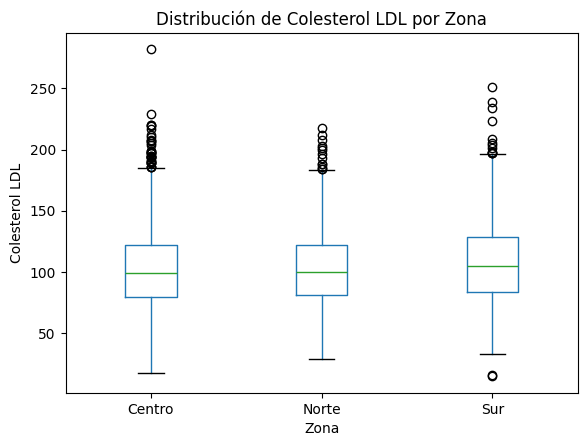

In [168]:
# <CODE> 4. Visualizar resultados
plt.figure(figsize=(6, 5))
ens.boxplot(column="Colesterol_LDL_Calculado", by="Zona_geo", grid=False)
plt.title("Distribución de Colesterol LDL por Zona")
plt.suptitle("")
plt.xlabel("Zona")
plt.ylabel("Colesterol LDL")
plt.show()

In [169]:
# <CODE> 5. Prueba de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=ens["Colesterol_LDL_Calculado"].dropna(),
                          groups=ens["Zona_geo"][ens["Colesterol_LDL_Calculado"].notna()],
                          alpha=0.05)
print(tukey)   

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Centro  Norte   0.5829 0.9186 -2.8987 4.0645  False
Centro    Sur   4.9715 0.0002  2.0492 7.8938   True
 Norte    Sur   4.3886 0.0111  0.8193 7.9579   True
---------------------------------------------------
